In [1]:
import sys
!{sys.executable} -m pip install pandas numpy scikit-learn matplotlib seaborn


[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: /Library/Frameworks/Python.framework/Versions/3.12/bin/python3.12 -m pip install --upgrade pip


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option("display.max_columns", None)

DATA_PATH = "../data/songs.csv"  

In [5]:
df = pd.read_csv(DATA_PATH)
df.head()

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,playlist_subgenre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,6f807x0ima9a1j3VPbc7VN,I Don't Care (with Justin Bieber) - Loud Luxur...,Ed Sheeran,66,2oCs0DGTsRO98Gh5ZSl2Cx,I Don't Care (with Justin Bieber) [Loud Luxury...,2019-06-14,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,dance pop,0.748,0.916,6,-2.634,1,0.0583,0.1020,0.000000,0.0653,0.518,122.036,194754
1,0r7CVbZTWZgbTCYdfa2P31,Memories - Dillon Francis Remix,Maroon 5,67,63rPSO264uRjW1X5E6cWv6,Memories (Dillon Francis Remix),2019-12-13,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,dance pop,0.726,0.815,11,-4.969,1,0.0373,0.0724,0.004210,0.3570,0.693,99.972,162600
2,1z1Hg7Vb0AhHDiEmnDE79l,All the Time - Don Diablo Remix,Zara Larsson,70,1HoSmj2eLcsrR0vE9gThr4,All the Time (Don Diablo Remix),2019-07-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,dance pop,0.675,0.931,1,-3.432,0,0.0742,0.0794,0.000023,0.1100,0.613,124.008,176616
3,75FpbthrwQmzHlBJLuGdC7,Call You Mine - Keanu Silva Remix,The Chainsmokers,60,1nqYsOef1yKKuGOVchbsk6,Call You Mine - The Remixes,2019-07-19,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,dance pop,0.718,0.930,7,-3.778,1,0.1020,0.0287,0.000009,0.2040,0.277,121.956,169093
4,1e8PAfcKUYoKkxPhrHqw4x,Someone You Loved - Future Humans Remix,Lewis Capaldi,69,7m7vv9wlQ4i0LFuJiE2zsQ,Someone You Loved (Future Humans Remix),2019-03-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,dance pop,0.650,0.833,1,-4.672,1,0.0359,0.0803,0.000000,0.0833,0.725,123.976,189052


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32833 entries, 0 to 32832
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   track_id                  32833 non-null  object 
 1   track_name                32828 non-null  object 
 2   track_artist              32828 non-null  object 
 3   track_popularity          32833 non-null  int64  
 4   track_album_id            32833 non-null  object 
 5   track_album_name          32828 non-null  object 
 6   track_album_release_date  32833 non-null  object 
 7   playlist_name             32833 non-null  object 
 8   playlist_id               32833 non-null  object 
 9   playlist_genre            32833 non-null  object 
 10  playlist_subgenre         32833 non-null  object 
 11  danceability              32833 non-null  float64
 12  energy                    32833 non-null  float64
 13  key                       32833 non-null  int64  
 14  loudne

- There are **32,833 rows** and **23 columns**.
- The columns are a mix of:
  - **IDs and metadata**: `track_id`, `track_name`, `track_artist`,
    `track_album_id`, `track_album_name`, `track_album_release_date`,
    `playlist_name`, `playlist_id`, `playlist_genre`, `playlist_subgenre`.
  - **Audio feature columns** (continuous numbers):  
    `danceability`, `energy`, `loudness`, `speechiness`, `acousticness`,
    `instrumentalness`, `liveness`, `valence`, `tempo`.
  - A few other numeric fields: `track_popularity`, `key`, `mode`,
    `duration_ms`.
- Most audio features are stored as **floats** (`float64`), and things like
  popularity, key, mode, and duration are **integers** (`int64`), which is what
  we expect.
- Text fields such as IDs, names, and genres are stored as `object` type,
  which in pandas usually means strings.

This confirms that the dataset has the right kinds of columns for our project:
we have rich audio features for clustering/recommendations, plus metadata
that will be useful later for the UI and explanations.

Next, we check how many missing values each column has.

In [7]:
df.isna().sum().sort_values(ascending=False)

track_artist                5
track_album_name            5
track_name                  5
track_id                    0
key                         0
tempo                       0
valence                     0
liveness                    0
instrumentalness            0
acousticness                0
speechiness                 0
mode                        0
loudness                    0
danceability                0
energy                      0
playlist_subgenre           0
playlist_genre              0
playlist_id                 0
playlist_name               0
track_album_release_date    0
track_album_id              0
track_popularity            0
duration_ms                 0
dtype: int64

- Only three columns have missing values:
  - `track_artist`: **5** missing
  - `track_album_name`: **5** missing
  - `track_name`: **5** missing
- All other columns, including the **audio features** and numeric fields like `track_popularity`, `duration_ms`,
  etc., have **0 missing values**.

The audio feature space is completely filled in, so we don't need to do any
imputation there. The only missing data is in some track metadata (name/artist/
album), which mainly affects how those specific tracks could be displayed in
the UI, not the numeric analysis itself.

Here we select all numeric columns (ints, floats, bools)to get basic summary statistics:

- `count` – how many non-null values each numeric column has.
- `mean`, `std` – the average and standard deviation.
- `min`, `max` – the range of values.
- `25%`, `50%`, `75%` – the quartiles (1st, median, 3rd).

This gives us a quick sense of the typical ranges and distributions of the
audio features and other numeric fields in the dataset.

In [8]:
numeric_cols = df.select_dtypes(include=["float64", "int64", "bool"]).columns
df[numeric_cols].describe()

,track_popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
count,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000
mean,42.477081,0.654850,0.698619,5.374471,-6.719499,0.565711,0.107068,0.175334,0.084747,0.190176,0.510561,120.881132,225799.811622
std,24.984074,0.145085,0.180910,3.611657,2.988436,0.495671,0.101314,0.219633,0.224230,0.154317,0.233146,26.903624,59834.006182
min,0.000000,0.000000,0.000175,0.000000,-46.448000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4000.000000
25%,24.000000,0.563000,0.581000,2.000000,-8.171000,0.000000,0.041000,0.015100,0.000000,0.092700,0.331000,99.960000,187819.000000
50%,45.000000,0.672000,0.721000,6.000000,-6.166000,1.000000,0.062500,0.080400,0.000016,0.127000,0.512000,121.984000,216000.000000
75%,62.000000,0.761000,0.840000,9.000000,-4.645000,1.000000,0.132000,0.255000,0.004830,0.248000,0.693000,133.918000,253585.000000
max,100.000000,0.983000,1.000000,11.000000,1.275000,1.000000,0.918000,0.994000,0.994000,0.996000,0.991000,239.440000,517810.000000


From the summary:

- **track_popularity** ranges from **0 to 100**, with a mean around **42** and
  median **45**, so the dataset contains a mix of unpopular and moderately
  popular tracks, not just hits.

- The main audio features (`danceability`, `energy`, `speechiness`,
  `acousticness`, `instrumentalness`, `liveness`, `valence`) are all in the
  expected **[0, 1] range**:
  - Average **danceability** is about **0.65**, so tracks are fairly
    danceable.
  - Average **energy** is about **0.70**, meaning most songs are on the
    medium-to-high energy side.
  - **Acousticness** (~0.18) and **instrumentalness** (~0.085) are relatively
    low on average, which fits a dataset dominated by produced, vocal tracks,
    with a smaller portion of fully acoustic or purely instrumental music.

- **Loudness** has a mean around **−6.7 dB**, with values ranging roughly from
  −46 dB to +1 dB, which is typical for modern audio recordings.

- **Tempo** (shown further to the right in the table) ranges roughly from
  around **50–200 BPM**, with a median in the mid-120s, so we have both slow
  and fast songs, but a lot of tracks are in the typical pop/EDM tempo range.

Overall, these statistics confirm that the numeric features are in sensible
ranges for audio data and give us a rough idea of the kinds of songs in the
dataset: mostly medium-to-high energy, fairly danceable tracks, with a mix of
acoustic/instrumental pieces and a wide spread of popularity.


We explicitly check that all of the main audio feature columns stay within the expected
**[0, 1]** range.

In [9]:
checks = {
    "danceability": (0, 1),
    "energy": (0, 1),
    "speechiness": (0, 1),
    "acousticness": (0, 1),
    "instrumentalness": (0, 1),
    "liveness": (0, 1),
    "valence": (0, 1),
}

for col, (lo, hi) in checks.items():
    print(
        f"{col}: min={df[col].min():.3f}, max={df[col].max():.3f}, "
        f"within_0_1={df[col].between(lo, hi).all()}"
    )


danceability: min=0.000, max=0.983, within_0_1=True
energy: min=0.000, max=1.000, within_0_1=True
speechiness: min=0.000, max=0.918, within_0_1=True
acousticness: min=0.000, max=0.994, within_0_1=True
instrumentalness: min=0.000, max=0.994, within_0_1=True
liveness: min=0.000, max=0.996, within_0_1=True
valence: min=0.000, max=0.991, within_0_1=True


- All of these features have minimum values very close to **0.0** and maximum
  values below or equal to **1.0**.
- The `within_0_1` flag is **True** for every column.

This confirms that the audio features are properly normalized to the
[0, 1] scale. That’s important
because:

- It makes features directly comparable (e.g., "0.8 energy" vs "0.2 energy"),
- and it simplifies later steps like scaling and clustering, since there are no
  unexpected out-of-range values or obvious data errors.

Next, we also check for duplicated tracks in the dataset:

In [10]:
print("Duplicate track_id:", df["track_id"].duplicated().sum())
print("Duplicate track_name/artist pairs:",
      df.duplicated(subset=["track_name", "track_artist"]).sum())

Duplicate track_id: 4477
Duplicate track_name/artist pairs: 6603


- **4,476** rows have a duplicated `track_id`.
- **6,599** rows have a duplicated `(track_name, track_artist)` pair.

This means some songs appear multiple times in the dataset, which is
expected for this type of data (the same track can show up on multiple
albums, releases, or playlists). For our purposes, this tells us that
the dataset is not strictly one row per unique song, but that
certain tracks are over-represented. We keep this in mind when doing
clustering and recommendations, since very common songs may count more
than once in the statistics.

Here we plot histograms for three important numeric features:

- `track_popularity` – how popular each track is (0–100),
- `valence` – how positive/happy a track sounds (0–1),
- `energy` – how loud/intense a track sounds (0–1).

Each histogram shows how many tracks fall into different value ranges, giving us
a visual sense of the distributions of these variables in the dataset.

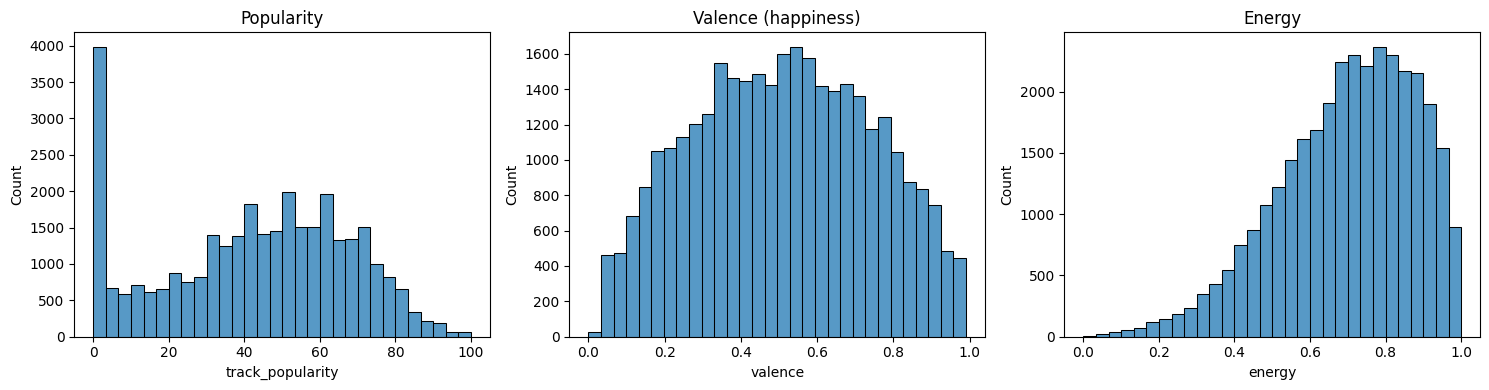

In [16]:
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

sns.histplot(df["track_popularity"], bins=30, ax=axes[0])
axes[0].set_title("Popularity")

sns.histplot(df["valence"], bins=30, ax=axes[1])
axes[1].set_title("Valence (happiness)")

sns.histplot(df["energy"], bins=30, ax=axes[2])
axes[2].set_title("Energy")

plt.tight_layout()
plt.show()

**Popularity**

- There is a large spike at **0 popularity**, meaning many tracks in the dataset
  are essentially unknown or very rarely listened to.
- Beyond 0, popularity values spread out between roughly **10 and 70**, with
  relatively fewer tracks near the very top (close to 100).
- This tells us the dataset contains a mix of obscure and moderately popular
  songs, not just top hits.

**Valence (happiness)**

- Valence covers the full [0, 1] range.
- Most tracks sit around **0.3–0.7**, with fewer very sad (near 0) or extremely
  happy (near 1) songs.
- This means the dataset has good coverage of different emotional tones, with
  a slight concentration around neutral-to-mildly-positive moods.

**Energy**

- Energy is heavily skewed toward **higher values**: most tracks are between
  **0.6 and 0.9**, and very low-energy tracks (near 0) are relatively rare.
- This suggests the dataset is biased toward **medium- and high-energy music**
  (pop, rock, dance, etc.), while calm/low-energy tracks are present but form a
  smaller portion.

We want to look at the distribution of genres in the dataset. 
This shows which high-level playlist genres are most common in the
dataset and how many tracks belong to each.

In [14]:
df["playlist_genre"].value_counts().head(20)

playlist_genre
edm      6043
rap      5743
pop      5507
r&b      5431
latin    5153
rock     4951
Name: count, dtype: int64

These six genres are the dominant top-level playlist genres in the dataset.
Together they account for a large portion of all tracks.

This tells us that the dataset is heavily focused on modern popular styles
(EDM, rap, pop, R&B, Latin, rock).